Importovanie potrebných knižníc

In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import pandas as pd
import numpy as np
import patsy
import matplotlib.pyplot as plt
from statsmodels.graphics.correlation import plot_corr
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
plt.style.use('seaborn')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  classification_report
from sklearn.tree import DecisionTreeClassifier
import VisualizeNN as VisNN



Načítanie datasetu

In [2]:
df = pd.read_csv('data.csv',header=0)

In [3]:

df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


Základné info o datasete

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [5]:
list(df.columns)

['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age_0-9',
 'Age_10-19',
 'Age_20-24',
 'Age_25-59',
 'Age_60+',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender',
 'Severity_Mild',
 'Severity_Moderate',
 'Severity_None',
 'Severity_Severe',
 'Contact_Dont-Know',
 'Contact_No',
 'Contact_Yes',
 'Country']

Zlúčenie niektorých stĺpcov do jedného

In [6]:
severity=[]
gender=[]
age=[]
for index, row in df.iterrows():
    if row['Severity_Severe'] == 1:
        severity.append(3)
    if row['Severity_Moderate'] == 1:
        severity.append(2)
    if row['Severity_Mild'] == 1:
        severity.append(1)
    if row['Severity_None'] == 1:
        severity.append(0) 
    if row['Age_0-9'] == 1:
        age.append(0)
    if row['Age_10-19'] == 1:
        age.append(1) 
    if row['Age_20-24'] == 1:
        age.append(2) 
    if row['Age_25-59'] == 1:
        age.append(3) 
    if row['Age_60+'] == 1:
        age.append(4) 
    if row['Gender_Female'] == 1:
        gender.append(0) 
    if row['Gender_Male'] == 1:
        gender.append(1) 
    if row['Gender_Transgender'] == 1:
        gender.append(2) 
         
     


Pridanie stĺpcov do dataframu

In [7]:
df['severity']=severity
df['Age']=age
df['Gender']=gender


Vybranie stĺpcov ktoré chcem použiť
Rozdelenie dát na trénovacie a testovacie v 3:7

In [8]:
X = df[['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age',
  'Gender'      
 ]]
y = df[[ 'Severity_Severe'
 ]]
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

Vybranie stĺpcov ktoré chcem použiť
tentokrát ako chceme určiť severity

In [9]:
X2 = df[['Fever',
 'Tiredness',
 'Dry-Cough',
 'Difficulty-in-Breathing',
 'Sore-Throat',
 'None_Sympton',
 'Pains',
 'Nasal-Congestion',
 'Runny-Nose',
 'Diarrhea',
 'None_Experiencing',
 'Age',
  'Gender'      
 ]]
y2 = df[[ 'severity'
 ]]
test_data_size = 0.3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = test_data_size)
train_data2 = pd.concat([X2_train, y2_train], axis = 1)
test_data2 = pd.concat([X2_test, y2_test], axis = 1)

Zistenie korelácie medzi jednotlivými stĺpcami

In [10]:
corrMatrix = train_data.corr(method = 'pearson')
corrMatrix

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age,Gender,Severity_Severe
Fever,1.000000,0.404441,0.051167,-0.136896,-0.164661,-0.174084,0.001182,-0.000452,-0.002343,-0.000561,0.000746,0.000936,-0.001340,-0.001664
Tiredness,0.404441,1.000000,0.378783,0.000623,-0.133696,-0.258469,0.000458,0.000342,-0.001688,-0.003208,0.001340,0.001849,-0.000514,-0.001723
Dry-Cough,0.051167,0.378783,1.000000,0.377958,0.052204,-0.292918,-0.000565,-0.001637,0.000421,0.001544,0.001797,0.001956,0.000377,-0.001795
Difficulty-in-Breathing,-0.136896,0.000623,0.377958,1.000000,0.404461,-0.259069,-0.000977,0.000538,0.001302,-0.000535,0.000042,0.000840,0.002195,-0.001479
Sore-Throat,-0.164661,-0.133696,0.052204,0.404461,1.000000,-0.174567,0.002028,-0.000607,0.000242,0.000592,-0.000879,0.001655,0.001893,0.000425
None_Sympton,-0.174084,-0.258469,-0.292918,-0.259069,-0.174567,1.000000,0.000049,0.000408,-0.000866,0.000483,-0.000255,-0.000982,-0.002082,-0.000379
Pains,0.001182,0.000458,-0.000565,-0.000977,0.002028,0.000049,1.000000,0.310479,-0.070224,-0.178007,-0.239433,-0.001198,-0.000961,-0.000160
Nasal-Congestion,-0.000452,0.000342,-0.001637,0.000538,-0.000607,0.000408,0.310479,1.000000,0.266872,-0.069043,-0.346640,0.000091,-0.000907,-0.000673
Runny-Nose,-0.002343,-0.001688,0.000421,0.001302,0.000242,-0.000866,-0.070224,0.266872,1.000000,0.310920,-0.346042,0.003964,-0.000765,0.000425
Diarrhea,-0.000561,-0.003208,0.001544,-0.000535,0.000592,0.000483,-0.178007,-0.069043,0.310920,1.000000,-0.239239,0.000472,0.000266,0.000159


Skontrolovanie zastúpenia jednotlivých vekových kategórii

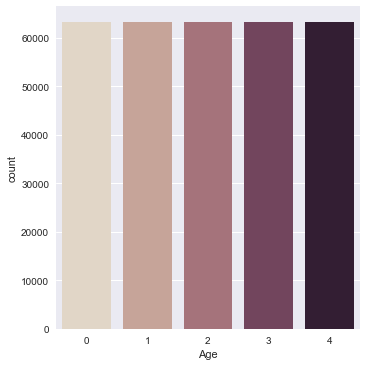

In [11]:
sns.catplot(x="Age", kind="count", palette="ch:.25", data=df)

Skontrolovanie zastúpenia jednotlivých závažností

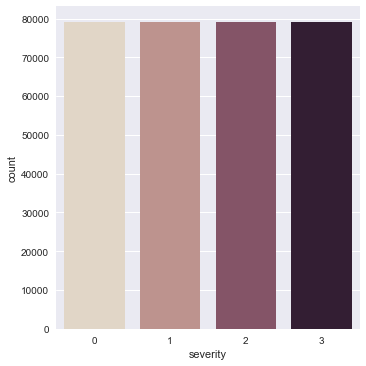

In [12]:
sns.catplot(x="severity", kind="count", palette="ch:.25", data=df)


Skontrolovanie zastúpenia jednotlivých pohlavií

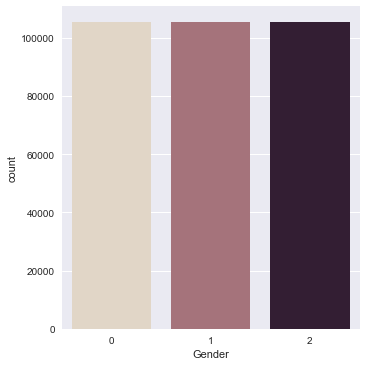

In [13]:
sns.catplot(x="Gender", kind="count", palette="ch:.25", data=df)

Vizualizácia korelačnej matice

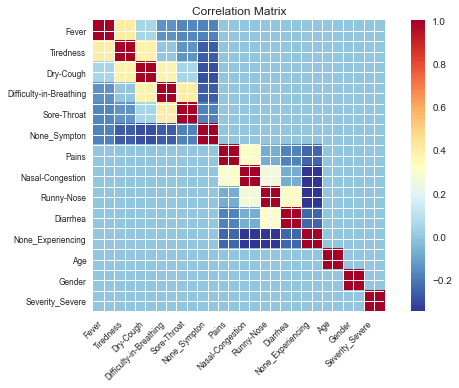

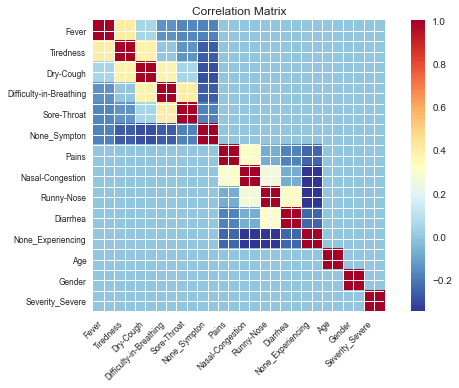

In [14]:
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

Vizualizácia korelačnej matice

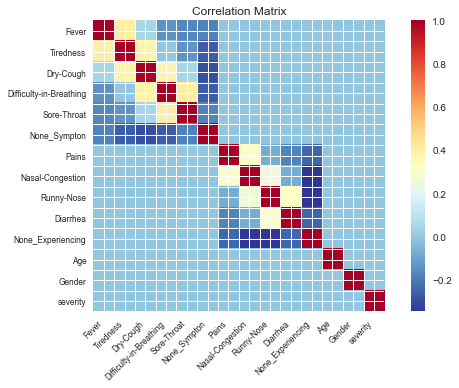

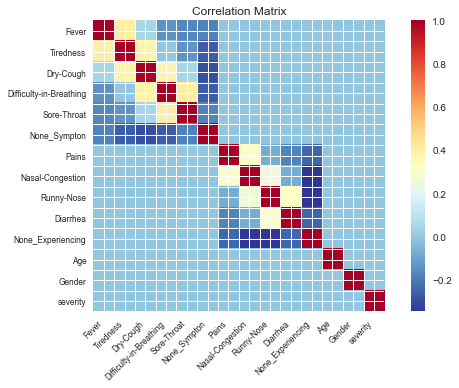

In [15]:
xnames=list(train_data2.columns)
ynames=list(train_data2.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

Využívame viacvrstvový perceptrón
Aktivačnú funkciu využívam relu, pretože s inými sa nedosahovala iná presnosť.
Zvolil som 2 skryté vrstvy. V 1. vrstve som zvolil 6 a v 2. 3 neuróny na základe:
geometrického pyramidového pravidla
r = (nbrINP/nbrOUT)^(1/3)
nbrHID1 = nbrOUT*(r^2) – počet neurónov v 1. skrytej vrstve
nbrHID2 = nbrOUT*r  – počet neurónov v 2. skrytej vrstve
Zdroj:
str.7
https://core.ac.uk/download/pdf/299806673.pdf

In [31]:
modelmlp=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(6,3),max_iter=10000)

In [32]:
print(modelmlp.fit(X_train,y_train))
print("y_train set score: %f" % modelmlp.score(X_train, y_train))
print("y_test set score: %f" % modelmlp.score(X_test, y_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 3), max_iter=10000)
y_train set score: 0.749905
y_test set score: 0.750221


In [33]:
modelmlp.score(X_test,y_test)

0.7502209595959596

In [34]:
modelmlp.predict_proba(X_test)

array([[0.74412066, 0.25587934],
       [0.74310877, 0.25689123],
       [0.74279273, 0.25720727],
       ...,
       [0.74415354, 0.25584646],
       [0.74191481, 0.25808519],
       [0.7443563 , 0.2556437 ]])

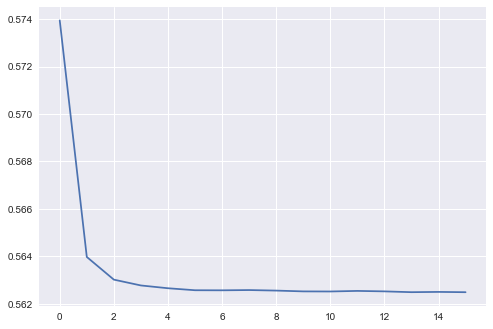

In [35]:
plt.plot(modelmlp.loss_curve_)

In [36]:
y_pred = modelmlp.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     71301
           1       0.00      0.00      0.00     23739

    accuracy                           0.75     95040
   macro avg       0.38      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
modelmlp.best_loss_

0.5624858113039031

In [38]:
modelmlp.coefs_

[array([[-2.87953551e-01,  2.38868230e-02,  9.55481294e-02,
         -4.03184353e-02,  1.39305409e-03,  1.12622403e-01],
        [-1.34773016e-01, -4.40453948e-02,  3.59070923e-01,
         -2.96282696e-02,  4.66318205e-02,  5.77005950e-02],
        [-1.90100363e-01, -1.14870398e-01, -4.36574736e-02,
         -1.21213305e-01, -1.37850587e-03,  1.45393621e-01],
        [ 1.80019648e-01, -1.92009449e-01,  2.04578403e-01,
         -1.29770407e-01, -4.15027308e-05, -2.38372783e-01],
        [ 1.78983072e-01, -2.26896663e-01, -2.64398370e-01,
         -3.00169075e-02,  1.32048485e-06,  8.73061866e-02],
        [ 1.73937666e-01,  2.59650674e-02,  2.89633310e-01,
         -1.28090481e-01, -1.26373735e-27,  1.51045558e-02],
        [ 1.74071521e-01,  2.07075805e-01,  3.36081915e-02,
          1.69586735e-01,  1.00607357e-02, -4.76730823e-02],
        [-1.81226932e-01, -4.38935618e-01,  2.53605998e-01,
          1.25129006e-01, -1.02014019e-02,  1.62188578e-01],
        [ 1.72297656e-01,  1.825

Vizualizácia použitej neurónovej siete

In [39]:
network_structure = np.hstack(([X.shape[1]], np.asarray(modelmlp.hidden_layer_sizes), [y.shape[1]]))

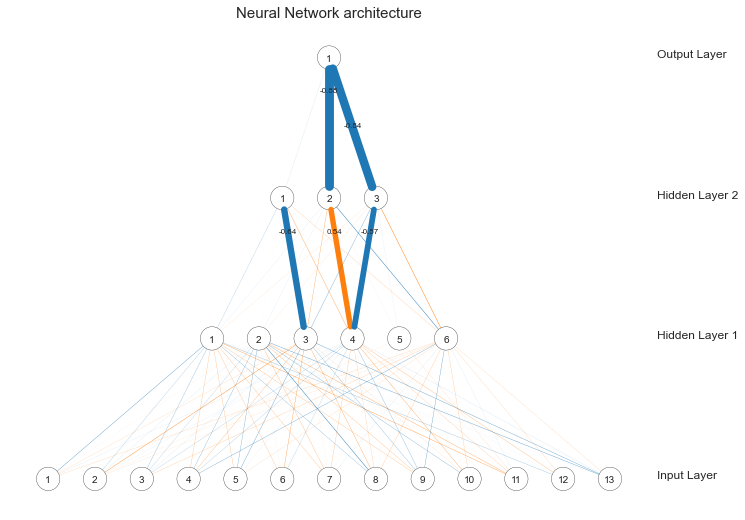

In [40]:
network=VisNN.DrawNN(network_structure, modelmlp.coefs_)
network.draw()

Vyskúšal som aj klasifikovať do 4 závažností ale presnosť bola veľmi nízka cca 0.25

In [41]:
modelmlp2=MLPClassifier(activation='relu',alpha=0.001,hidden_layer_sizes=(6,3),max_iter=10000)

In [42]:
print(modelmlp2.fit(X2_train,y2_train))
print("Training set score: %f" % modelmlp2.score(X2_train, y2_train))
print("Test set score: %f" % modelmlp2.score(X2_test, y2_test))

C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(6, 3), max_iter=10000)
Training set score: 0.250654
Test set score: 0.248474


In [43]:
y2_pred = modelmlp2.predict(X2_test)

print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.25      0.23      0.24     23681
           1       0.25      0.12      0.16     23953
           2       0.00      0.00      0.00     23587
           3       0.25      0.64      0.36     23819

    accuracy                           0.25     95040
   macro avg       0.19      0.25      0.19     95040
weighted avg       0.19      0.25      0.19     95040



C:\Users\mvlca\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Vyskúšanie použitia DecisionTree

In [44]:
DecisionTree = DecisionTreeClassifier(max_depth=10, min_samples_split=2,
    random_state=0)



DecisionTree = DecisionTree.fit(X_train, y_train)
pred = DecisionTree.predict(X_test)
print('DecisionTree score: ',DecisionTree.score(X_test,y_test))


DecisionTree score:  0.7502209595959596
